In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [11]:
dataset_name = "Augmented Images"

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    dataset_name,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_name,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)


Found 6496 images belonging to 6 classes.
Found 1624 images belonging to 6 classes.


Sample Training Images:


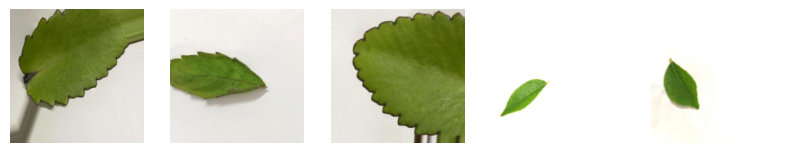

Sample Testing Images:


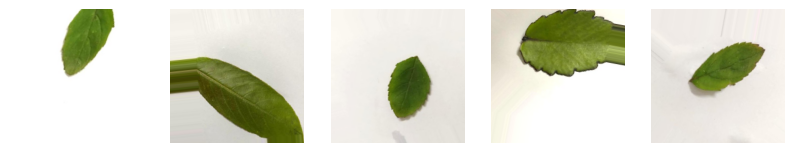

In [3]:
def plot_sample_images(generator, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        batch = generator.next()
        image = batch[0][0]
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Print sample training images
print("Sample Training Images:")
plot_sample_images(train_generator)

# Print sample testing images
print("Sample Testing Images:")
plot_sample_images(validation_generator)


In [4]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False


In [5]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
102/102 [==============================] - 363s 3s/step - loss: 0.3012 - accuracy: 0.9260 - val_loss: 0.0582 - val_accuracy: 0.9969
Epoch 2/10
102/102 [==============================] - 325s 3s/step - loss: 0.0467 - accuracy: 0.9940 - val_loss: 0.0320 - val_accuracy: 0.9975
Epoch 3/10
102/102 [==============================] - 351s 3s/step - loss: 0.0273 - accuracy: 0.9969 - val_loss: 0.0230 - val_accuracy: 0.9969
Epoch 4/10
102/102 [==============================] - 337s 3s/step - loss: 0.0205 - accuracy: 0.9969 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 5/10
102/102 [==============================] - 326s 3s/step - loss: 0.0158 - accuracy: 0.9980 - val_loss: 0.0138 - val_accuracy: 0.9982
Epoch 6/10
102/102 [==============================] - 318s 3s/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 7/10
102/102 [==============================] - 325s 3s/step - loss: 0.0113 - accuracy: 0.9988 - val_loss: 0.0104 - val_accuracy: 0.9988

In [14]:
# Assuming 'model' is your trained model
model.save("trained_model.h5")


C:\Users\killa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Sample Training Images:


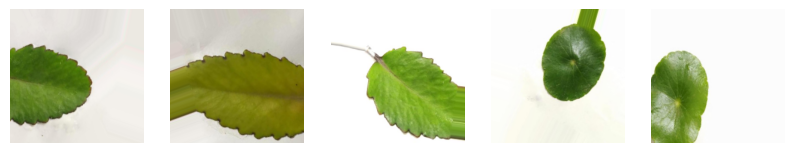

In [8]:
print("Sample Training Images:")
plot_sample_images(train_generator)


Sample Testing Images:


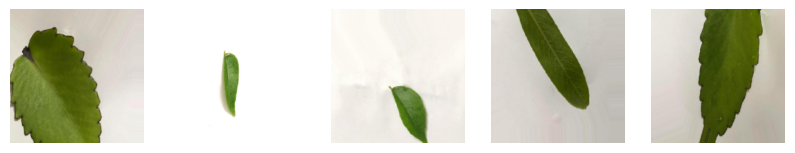

In [10]:
print("Sample Testing Images:")
plot_sample_images(validation_generator)


In [2]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_label = class_labels[predicted_class_index]

    return predicted_class_index, predicted_label

# Example usage
model_path = "trained_model.h5"  # Path to your trained model
img_path = r"C:\Users\killa\Augmented Images\Neem Leaf\Neem Leag Aug (1).jpg"  # Path to the image you want to predict
class_labels = {
    0: 'Arjun Leaf',
    1: 'Curry Leaf',
    2: 'Marsh Pennywort Leaf',
    3: 'Mint Leaf',
    4: 'Neem Leaf',
    5: 'Rubble Leaf'
}

loaded_model = tf.keras.models.load_model(model_path)

predicted_index, predicted_label = predict_image(loaded_model, img_path)
print("Predicted Label Index:", predicted_index)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 2s 2s/step
Predicted Label Index: 4
Predicted Label: Neem Leaf


1/1 [==============================] - 2s 2s/step


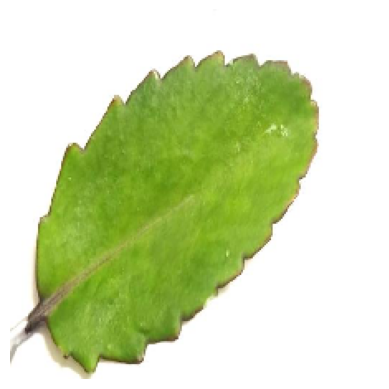

Predicted Label Index: 5
Predicted Label: Rubble Leaf
Actual Label: Rubble Leaf
Prediction: Medical plant


In [3]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_label = class_labels.get(predicted_class_index, "Non-medical plant")
    if predicted_label in labels:
        predicted_label = "Medical plant"

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return predicted_class_index, predicted_label

model_path = "trained_model.h5"  
img_path = r"C:\Users\killa\Augmented Images\Rubble Leaf\Rubble Leaf Aug  (56).jpg" 
labels = [
    'Arjun Leaf',
    'Curry Leaf',
    'Marsh Pennywort Leaf',
    'Mint Leaf',
    'Neem Leaf',
    'Rubble Leaf'
]
class_labels = {
    0: 'Arjun Leaf',
    1: 'Curry Leaf',
    2: 'Marsh Pennywort Leaf',
    3: 'Mint Leaf',
    4: 'Neem Leaf',
    5: 'Rubble Leaf'
}

loaded_model = tf.keras.models.load_model(model_path)
predicted_index, predicted_label = predict_image(loaded_model, img_path)
actual_label = labels[predicted_index]
predicted_label = class_labels.get(predicted_index, "Non-medical plant")

print("Predicted Label Index:", predicted_index)
print("Predicted Label:", predicted_label)
print("Actual Label:", actual_label)
if predicted_label in labels:
    print("Prediction: Medical plant")
else:
    print("Predicion: Non-medical plant")





26/26 [==============================] - 81s 3s/step


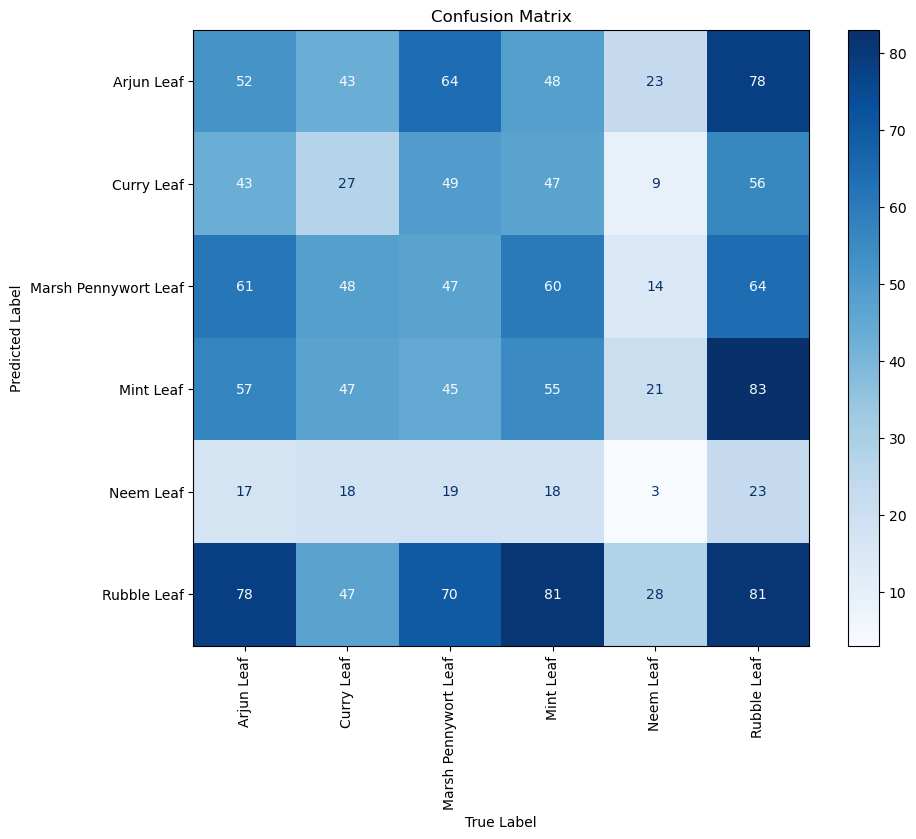

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "trained_model.h5"
loaded_model = load_model(model_path)

# Make predictions on the validation set
validation_predictions = loaded_model.predict(validation_generator)
predicted_labels = np.argmax(validation_predictions, axis=1)

# Get the true labels
true_labels = validation_generator.classes

# Define class labels
labels = ['Arjun Leaf', 'Curry Leaf', 'Marsh Pennywort Leaf', 'Mint Leaf', 'Neem Leaf', 'Rubble Leaf']

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Rotate the tick labels on the x-axis vertically
plt.xticks(rotation=90)

plt.show()


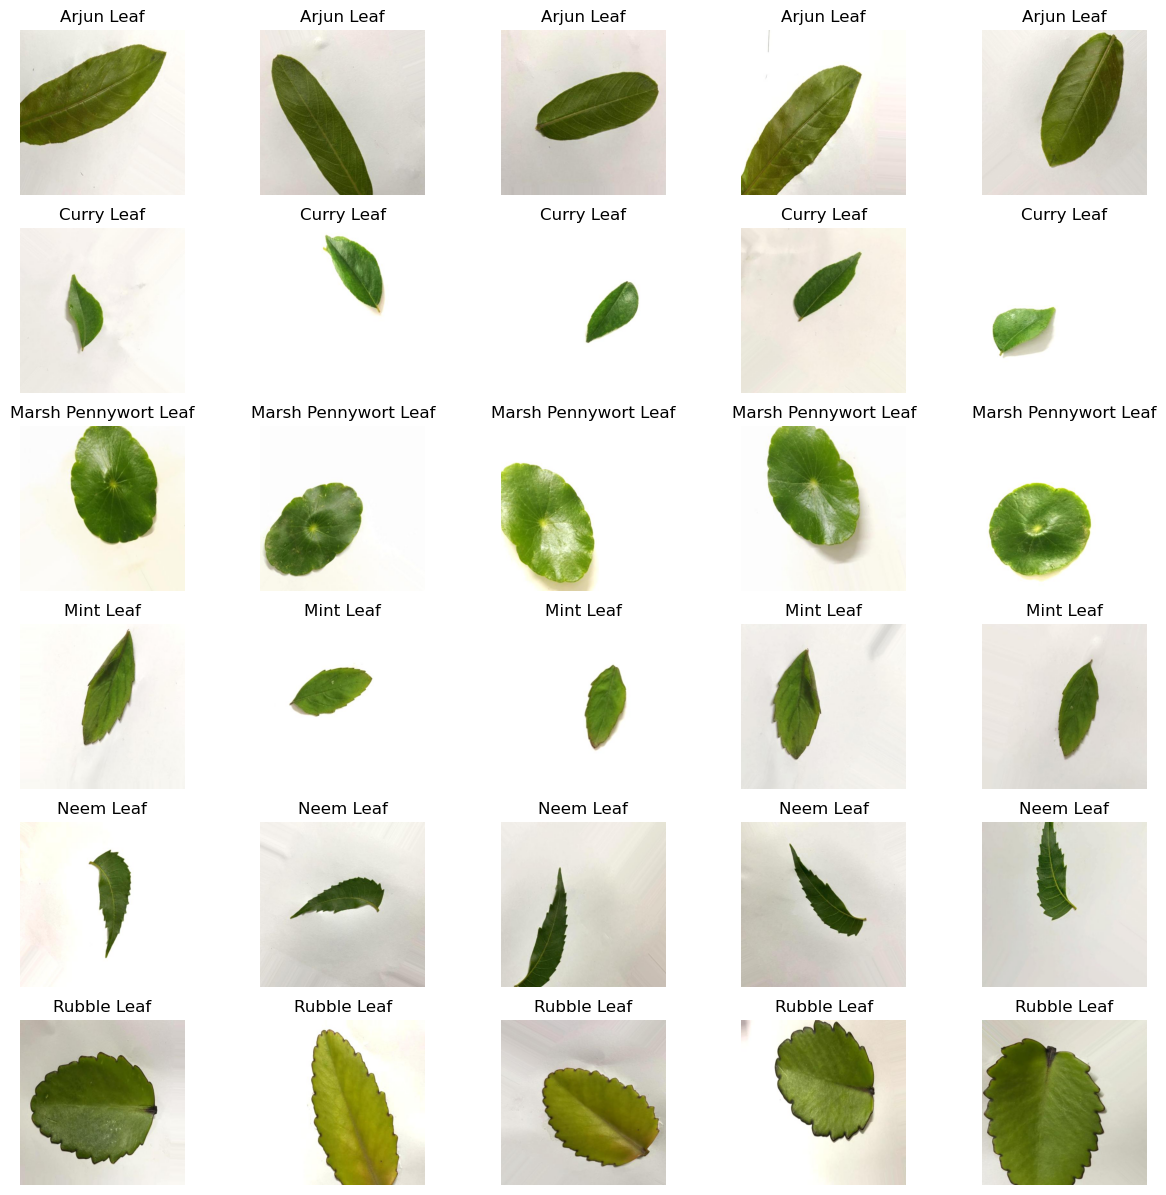

In [16]:
import os

def plot_dataset_images(dataset_path, class_labels, num_images_per_class=5):
    plt.figure(figsize=(15, 15))
    for label_index, label in enumerate(class_labels):
        label_dir = os.path.join(dataset_path, label)
        image_files = os.listdir(label_dir)[:num_images_per_class]
        for i, image_file in enumerate(image_files, start=1):
            img_path = os.path.join(label_dir, image_file)
            img = plt.imread(img_path)
            plt.subplot(len(class_labels), num_images_per_class, label_index * num_images_per_class + i)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
    plt.show()

# Assuming your dataset is structured like this:
# - Augmented Images
#   - Arjun Leaf
#   - Curry Leaf
#   - Marsh Pennywort Leaf
#   - Mint Leaf
#   - Neem Leaf
#   - Rubble Leaf

dataset_path = "Augmented Images"
class_labels = [
    'Arjun Leaf',
    'Curry Leaf',
    'Marsh Pennywort Leaf',
    'Mint Leaf',
    'Neem Leaf',
    'Rubble Leaf'
]

plot_dataset_images(dataset_path, class_labels)


Sample Images from the Dataset:


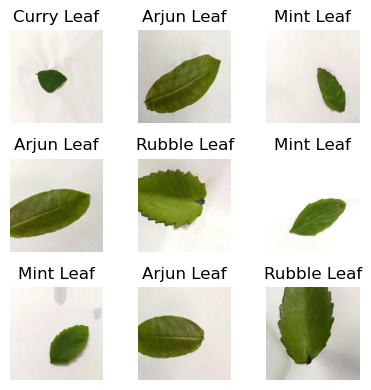

In [19]:
def plot_dataset_images(generator, num_images=9, image_size=(4, 4)):
    plt.figure(figsize=image_size)
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        batch = generator.next()
        image = batch[0][0]
        label_index = np.argmax(batch[1][0])
        label = class_labels[label_index]
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot dataset images with labels (smaller size)
print("Sample Images from the Dataset:")
plot_dataset_images(train_generator, image_size=(4, 4))
